## Base de dados breast_cancer

A base de dados pode ser encontrada [aqui](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic))

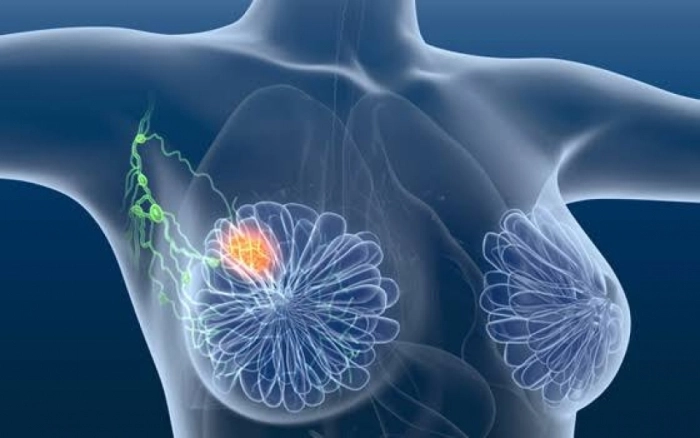

In [1]:
import pandas as pd
import numpy as np

In [2]:
previsores = pd.read_csv('entradas_breast.csv')
classe = pd.read_csv('saidas_breast.csv')

In [3]:
previsores.head(3)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,186.0000,275.0000,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,243.0000,0.3613,0.08758


Temos 30 colunas presentes no dataset fornecido, sendo 30 delas variáveis características (dados de entrada) a variável-alvo (que queremos que o nosso modelo seja capaz de prever) está em um dataset separado chamado 'saidas_breast.csv'

In [4]:
previsores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0    radius_mean              569 non-null    float64
 1    texture_mean             569 non-null    float64
 2    perimeter_mean           569 non-null    float64
 3    area_mean                569 non-null    float64
 4    smoothness_mean          569 non-null    float64
 5    compactness_mean         569 non-null    float64
 6    concavity_mean           569 non-null    float64
 7   concave_points_mean       569 non-null    float64
 8    symmetry_mean            569 non-null    float64
 9    fractal_dimension_mean   569 non-null    float64
 10   radius_se                569 non-null    float64
 11   texture_se               569 non-null    float64
 12   perimeter_se             569 non-null    float64
 13   area_se                  569 non-null    float64
 14   smoothnes

É possivel observar que todas as variáveis são do tipo ``float64`` (números "decimais").

Já que todos os valores do nosso dataset são numéricos, nós não precisaremos fazer o a transformação do tipo "object" para o tipo númerico.

In [5]:
previsores.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,706.771388,19.289649,91.969033,654.889104,4.304801,4.835984,7.489124,2.366459,16.965766,0.851112,...,315.194921,25.677223,107.261213,880.583128,10.633281,25.259112,26.723742,8.745685,30.367174,1.964313
std,2430.243368,4.301036,24.298981,351.914129,21.074558,26.827478,35.618994,16.155145,53.846023,7.103493,...,1655.459336,6.146258,33.602542,569.356993,37.236433,96.473015,114.204035,39.465975,90.748044,14.464355
min,7.760000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.116700,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,12.210000,16.170000,75.170000,420.300000,0.086410,0.065260,0.029580,0.020310,0.163400,0.057800,...,13.180000,21.080000,84.110000,515.300000,0.117800,0.150700,0.116800,0.064990,0.254900,0.071460
50%,13.850000,18.840000,86.240000,551.100000,0.095940,0.094620,0.063870,0.033900,0.181400,0.061660,...,15.150000,25.410000,97.660000,686.500000,0.133800,0.227900,0.249200,0.101500,0.288400,0.080060
75%,17.680000,21.800000,104.100000,782.700000,0.106100,0.132500,0.142500,0.077260,0.203600,0.066400,...,19.850000,29.720000,125.400000,1084.000000,0.150000,0.384200,0.431600,0.170800,0.331800,0.092110
max,9904.000000,39.280000,188.500000,2501.000000,123.000000,277.000000,313.000000,162.000000,304.000000,78.000000,...,9981.000000,49.540000,251.200000,4254.000000,185.000000,1058.000000,1252.000000,291.000000,544.000000,173.000000


A função ``describe()`` gera várias informações sobre as variáveis numéricas que também podem ser úteis

#### Encontrando dados faltantes (NaN)
Nosso dataset não possui valores faltantes como diz no site UCI, mas por via das dúvidas:

In [6]:
previsores.isnull().sum()

 radius_mean                0
 texture_mean               0
 perimeter_mean             0
 area_mean                  0
 smoothness_mean            0
 compactness_mean           0
 concavity_mean             0
concave_points_mean         0
 symmetry_mean              0
 fractal_dimension_mean     0
 radius_se                  0
 texture_se                 0
 perimeter_se               0
 area_se                    0
 smoothness_se              0
 compactness_se             0
 concavity_se               0
 concave_points_se          0
 symmetry_se                0
 fractal_dimension_se       0
 radius_worst               0
 texture_worst              0
 perimeter_worst            0
 area_worst                 0
 smoothness_worst           0
 compactness_worst          0
 concavity_worst            0
 concave_points_worst       0
 symmetry_worst             0
 fractal_dimension_worst    0
dtype: int64

Como esperado, não temos valores faltantes :D

###### Divisão das variáveis-características e das variavéis-alvo

In [7]:
X = previsores.iloc[:, 0:30].values
y = classe.iloc[:,0].values

#### Normalização dos dados
Podemos observar que os nossos dados estão em escalas diferentes das demais, para isso iremos utilizar a função ``MinMaxScaler`` para realizar a normalização dos dados

In [8]:
from sklearn.preprocessing import MinMaxScaler
normalizador = MinMaxScaler(feature_range = (0,1))
X = normalizador.fit_transform(X)

###### Utilizando a biblioteca de Implementação minimalista dos Mapas Auto-Organizáveis (SOM)
A biblioteca pode ser encontrada neste link: https://pypi.org/project/MiniSom/

###### Parâmetros do MiniSom
Link do repositório no github: https://github.com/JustGlowing/minisom

    x - Quantidade de linhas do mapa  (de acordo com a fórmula)
    y - Quantidade de colunas do mapa (de acordo com a fórmula)
    input_len - Quantidade de atributos (colunas)
    sigma - Alcance dos neurônios a serem pegos
    learning_rate - Taxa de aprendizagem
    random_seed - Semente aleatória (sempre ter o mesmoresultado)
    data - Dados de entrada
    num_iteration - número de interações (parecido com as 'epochs')
    
###### Aplicação da formúla: 
    √569 = 23,85
    23,85 . 5 = 119,26
    Mapa definido com as dimensões de 28x28 = 784 neurônios

In [9]:
from minisom import MiniSom

som = MiniSom(x = 28, y = 28, input_len = 30, random_seed = 0,
              learning_rate = 0.5, sigma = 1.0)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 1000)

In [10]:
# Blocos de pesos gerados
som._weights

array([[[9.65855985e-01, 1.58291932e-01, 1.23537256e-01, ...,
         2.03153239e-04, 5.29317019e-02, 2.20104541e-04],
        [9.48062280e-01, 2.15463496e-01, 1.28132611e-01, ...,
         2.38827494e-04, 2.97777743e-02, 2.14213513e-04],
        [6.62417101e-01, 2.72227390e-01, 2.24743105e-01, ...,
         3.31262764e-04, 1.49161155e-02, 1.87324338e-04],
        ...,
        [8.31677773e-04, 3.45757769e-01, 4.11054768e-01, ...,
         3.60393345e-04, 2.59425658e-04, 8.83199607e-05],
        [1.06303127e-03, 4.18136176e-01, 5.21308898e-01, ...,
         4.96846914e-04, 3.31756214e-04, 1.30657084e-04],
        [1.12914061e-03, 4.60944885e-01, 5.54013434e-01, ...,
         5.29910887e-04, 3.08868108e-04, 1.48485973e-04]],

       [[9.62108719e-01, 2.03043259e-01, 1.20429785e-01, ...,
         2.13538533e-04, 1.83269208e-02, 1.93854831e-04],
        [9.61100712e-01, 2.63856105e-01, 1.24425907e-01, ...,
         2.54684623e-04, 1.08960567e-02, 2.22886939e-04],
        [7.78625045e-01, 

In [11]:
# Valores do mapa auto organizável (8x8)
som._activation_map

array([[0.99559652, 0.98212012, 0.73807625, 0.50090425, 0.57004604,
        0.63183994, 0.79435501, 0.83789005, 0.66655148, 0.51626803,
        0.53919834, 0.97604756, 1.01160533, 1.01074743, 0.98529631,
        0.8536653 , 0.74440945, 0.54708254, 0.83767893, 0.92232176,
        1.28396563, 0.96037775, 0.48079125, 0.39739973, 0.44189805,
        0.56365686, 0.80260122, 0.89800491],
       [1.02776641, 1.06934356, 0.8756021 , 0.48000866, 0.53136997,
        0.5922194 , 0.68187703, 0.72277394, 0.60249696, 0.56264804,
        0.64834198, 0.79938048, 0.92219936, 0.98928384, 1.00656034,
        0.8620696 , 0.79653326, 0.71391334, 0.50714608, 0.74825791,
        1.01263331, 0.77230426, 0.43128421, 0.40242734, 0.43342798,
        0.55809878, 0.70333572, 0.77118776],
       [1.04448948, 1.09294116, 0.85286166, 0.48137223, 0.51487071,
        0.63169386, 0.55401849, 0.57324254, 0.48512427, 0.47095024,
        0.56259946, 0.75974034, 0.85904837, 0.917763  , 0.90626396,
        0.77370014, 0.7447

In [12]:
# Quantidade de vezes que os neurônios foram selecionados como principal
q = som.activation_response(X)
q

array([[6., 2., 0., 0., 2., 0., 1., 3., 0., 0., 0., 0., 0., 1., 1., 0.,
        0., 0., 0., 1., 3., 2., 0., 4., 2., 0., 1., 3.],
       [2., 1., 0., 0., 1., 1., 2., 2., 0., 5., 0., 0., 1., 0., 3., 1.,
        1., 0., 0., 0., 1., 0., 0., 3., 0., 2., 1., 0.],
       [4., 4., 0., 0., 1., 2., 0., 0., 0., 0., 0., 0., 3., 1., 0., 1.,
        6., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 2., 1., 0., 1., 0., 0.,
        3., 3., 4., 0., 0., 0., 0., 0., 0., 1., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
        0., 1., 1., 0., 3., 0., 1., 0., 2., 0., 0., 5.],
       [0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 3., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [3., 1., 3., 3., 2., 0., 0., 3., 3., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 4., 0., 0., 0., 2., 1., 0., 2., 1.],
       [2., 1., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 2., 0., 0., 0.,
        2., 0., 0., 0., 0

###### Geração do gráfico

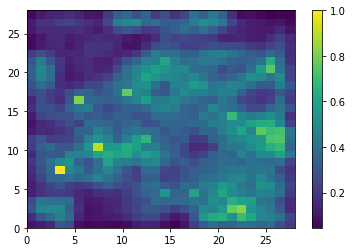

In [13]:
# MID - Média da distância de cada um dos neurônios
from pylab import pcolor, colorbar, plot
pcolor(som.distance_map().T)
colorbar()
# Quanto mais escuro ele for, mais parecido ele é dos seus vizinhos
# Quanto mais claro ele for, mais diferente ele é dos seus vizinhos

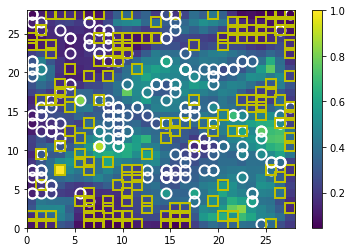

In [14]:
from pylab import pcolor, colorbar, plot
pcolor(som.distance_map().T)
colorbar()
# marcadores
markers = ['o', 's']
# cores
colors = ['w', 'y']
# geração do mapa com os marcadores e as cores
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5, w[1] + 0.5, markers[y[i]],
         markerfacecolor = 'None', markersize = 10,
         markeredgecolor = colors[y[i]], markeredgewidth = 2)